# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [237]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

# Define a dictionary structure for header row styling
df_header_row = {
    'selector': 'th.col_heading',
    'props': 'background-color: bisque;'
}

# Set the default size and resolution for plots to be used for the analysis
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 140

In [104]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [105]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [106]:
# Create a Beautiful Soup Object
website_html = browser.html
soup = soup(website_html, 'html.parser')

In [107]:
# Extract all rows of data
mars_data_table = soup.find_all('table')
mars_data_df = pd.read_html(str(mars_data_table))[0]

# Display sample data - minor data wrangling for hiding the index
mars_data_df.head().style.hide(axis="index").set_table_styles([df_header_row])

id,terrestrial_date,sol,ls,month,min_temp,pressure
2,2012-08-16,10,155,6,-75.000000,739.000000
13,2012-08-17,11,156,6,-76.000000,740.000000
24,2012-08-18,12,156,6,-76.000000,741.000000
35,2012-08-19,13,157,6,-74.000000,732.000000
46,2012-08-20,14,157,6,-74.000000,740.000000


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [108]:
# Create an empty list
mars_weather_list = []

# Create a table object for the extracted table from the website
mars_table = soup.find('table', class_='table')

# Loop through the scraped data to create a list of rows
mars_weather_table = mars_table.find_all('th')
for header_element in mars_weather_table:
    title = header_element.text
    mars_weather_list.append(title)

# Print the list with the table headers
print(mars_weather_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [109]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(columns = mars_weather_list)

# Iterate through the source table from the website to grab all the specific data elements for each row
for row in mars_table.find_all('tr', class_='data-row'):
        data_element = row.find_all('td')
        row_data = [td.text.strip() for td in data_element]
        length = len(mars_weather_df)
        mars_weather_df.loc[length] = row_data

In [110]:
# Confirm DataFrame was created successfully
mars_weather_df.head().style.hide(axis="index").set_table_styles([df_header_row])

id,terrestrial_date,sol,ls,month,min_temp,pressure
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [111]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [112]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [113]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [114]:
# 1. How many months are there on Mars?
number_of_months = mars_weather_df['month'].nunique()
print(f' There are {number_of_months} months on Mars.')

 There are 12 months on Mars.


In [115]:
# 2. How many Martian days' worth of data are there?
number_of_sols = mars_weather_df['sol'].nunique()
print(f' There are {number_of_sols} Martian days worth of data.')

 There are 1867 Martian days worth of data.


In [116]:
# 3. What is the average low temperature by month?
Avg_Mars_Temp_by_month = mars_weather_df.groupby(['month'])['min_temp'].mean()
Avg_Mars_Temp_by_month = Avg_Mars_Temp_by_month.to_frame()

# Display the results - apply minor data wrangling to reset the index to clean up the display
Avg_Mars_Temp_by_month = Avg_Mars_Temp_by_month.reset_index()

# Display the dataframe with minor additional formatting
Avg_Mars_Temp_by_month.style.hide(axis="index").set_table_styles([df_header_row])

month,min_temp
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642
10,-71.982143


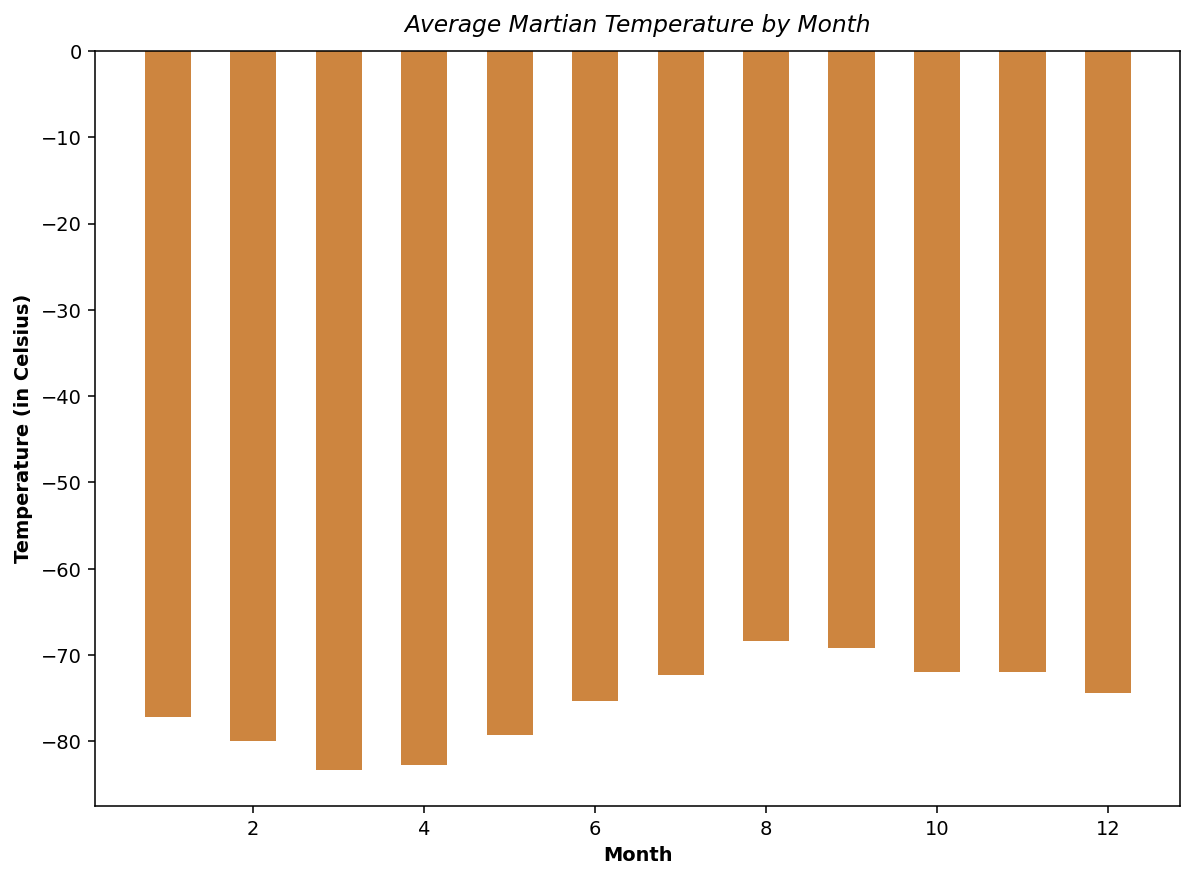

In [238]:
# Plot the average temperature by month

# Step 1: Generate a bar plot with the necessary axis formating using pyplot
plt.bar(Avg_Mars_Temp_by_month['month'] , Avg_Mars_Temp_by_month['min_temp'], color = 'peru', width = 0.54)
plt.title('Average Martian Temperature by Month', fontstyle = 'italic', size = 12, pad = 10)
plt.xlabel('Month', fontweight = 'bold', size=10)
plt.ylabel('Temperature (in Celsius)', fontweight = 'bold', size=10)

# Step 2: Display the unsorted bar plot
plt.show()

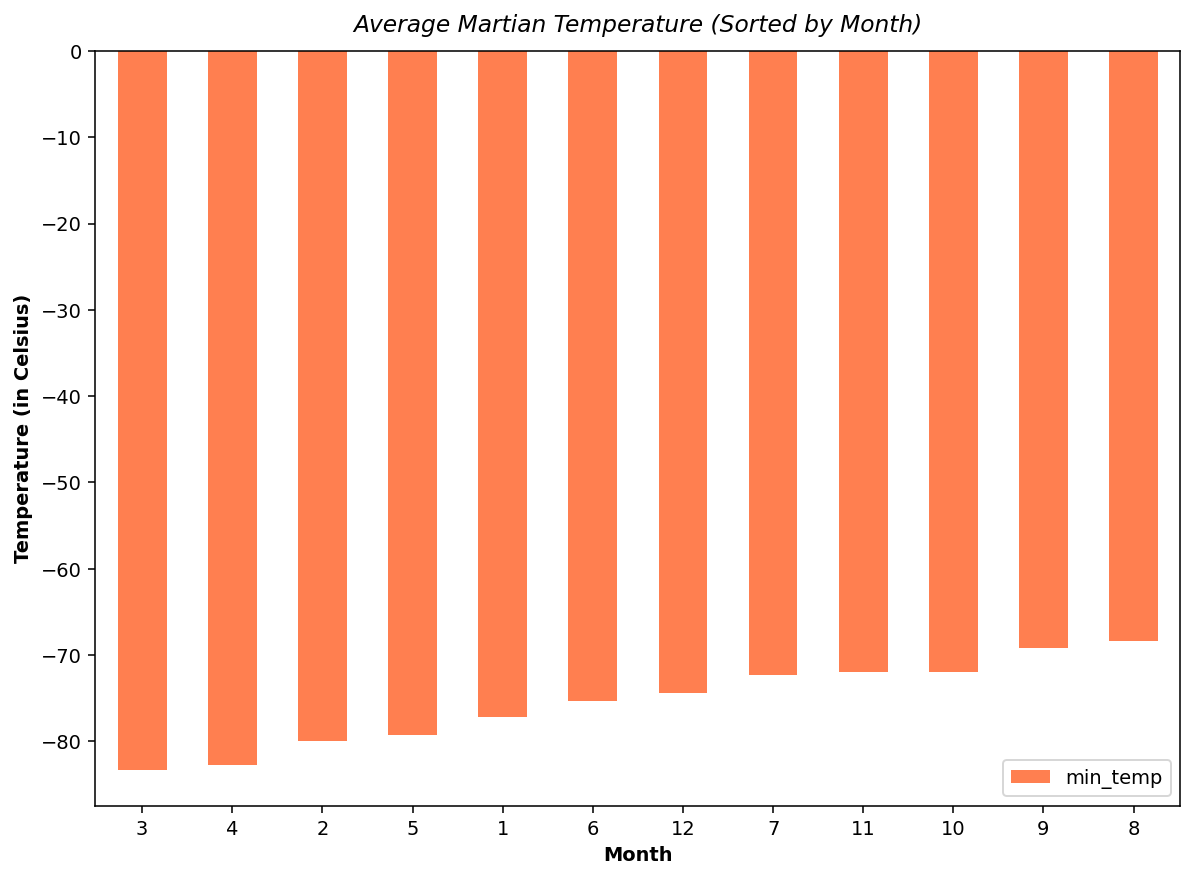

Coldest Month in Curiosity's Location: Month 3.
Hottest Month in Curiosity's Location: Month 8.


In [239]:
# Identify the coldest and hottest months in Curiosity's location

# Step 1: Sort the dataframe based on the minimum temperature values
Avg_Mars_Temp_Sorted = Avg_Mars_Temp_by_month.sort_values(by = 'min_temp').reset_index(drop = True)

# Step 2: Generate a bar plot with the necessary axis formating using pyplot
Avg_Mars_Temp_Sorted.set_index('month').plot.bar(rot = 0, color = 'coral', width = 0.54)
plt.title('Average Martian Temperature (Sorted by Month)', fontstyle = 'italic', size = 12, pad = 10)
plt.xlabel('Month', fontweight = 'bold', size = 10)
plt.ylabel('Temperature (in Celsius)', fontweight = 'bold', size=10)

# Step 3: Display the bar plot
plt.show()

# Step 4: Display the coldest and hottest months based on the results and the plot
Coldest_Month = Avg_Mars_Temp_Sorted.loc[:,'month'].values[0]
Hottest_Month = Avg_Mars_Temp_Sorted.loc[:,'month'].values[len(Avg_Mars_Temp_Sorted) - 1]
print(f'Coldest Month in Curiosity\'s Location: Month \033[1m{Coldest_Month}\033[0m.')
print(f'Hottest Month in Curiosity\'s Location: Month \033[1m{Hottest_Month}\033[0m.')

In [240]:
# 4. Average pressure by Martian month
Avg_Mars_Pressure_by_month = mars_weather_df.groupby(['month'])['pressure'].mean()
Avg_Mars_Pressure_by_month = Avg_Mars_Pressure_by_month.to_frame().reset_index()

# Rename the column name to signify average pressure
Avg_Mars_Pressure_by_month = Avg_Mars_Pressure_by_month.rename(columns={'pressure':'Average Pressure'})

# Display the dataframe with minor additional formatting
Avg_Mars_Pressure_by_month.style.hide(axis="index").set_table_styles([df_header_row])

month,Average Pressure
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970
10,887.312500


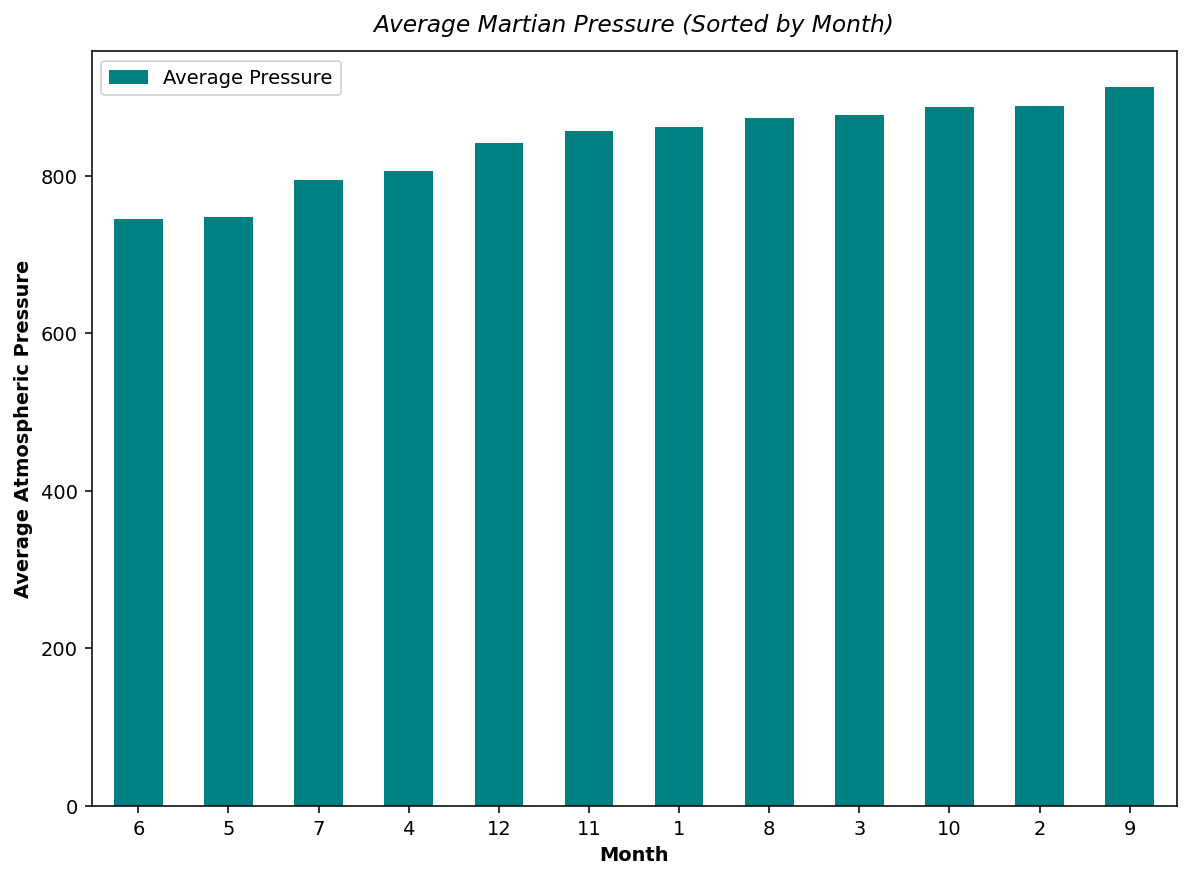

Month with least pressure, on an average: Month 6.
Month with highest pressure, on an average: Month 9.


In [241]:
# Plot the average pressure by month

# Step 1: Sort the dataframe based on the average pressure values
Avg_Mars_Pressure_Sorted = Avg_Mars_Pressure_by_month.sort_values(by = 'Average Pressure').reset_index(drop = True)

# Step 2: Generate a bar plot with the necessary axis formating using pyplot
Avg_Mars_Pressure_Sorted.set_index('month').plot.bar(rot = 0, color = 'teal', width = 0.54)
plt.title('Average Martian Pressure (Sorted by Month)', fontstyle = 'italic', size = 12, pad = 10)
plt.xlabel('Month', fontweight = 'bold', size=10)
plt.ylabel('Average Atmospheric Pressure', fontweight = 'bold', size = 10)

# Step 3: Display the bar plot
plt.show()

# Step 4: Output the months that have the lowest and highest atmospheric pressure, on an average
Lowest_Pressure_Month = Avg_Mars_Pressure_Sorted.loc[:,'month'].values[0]
Highest_Pressure_Month = Avg_Mars_Pressure_Sorted.loc[:,'month'].values[len(Avg_Mars_Pressure_Sorted) - 1]
print(f'Month with least pressure, on an average: Month \033[1m{Lowest_Pressure_Month}\033[0m.')
print(f'Month with highest pressure, on an average: Month \033[1m{Highest_Pressure_Month}\033[0m.')

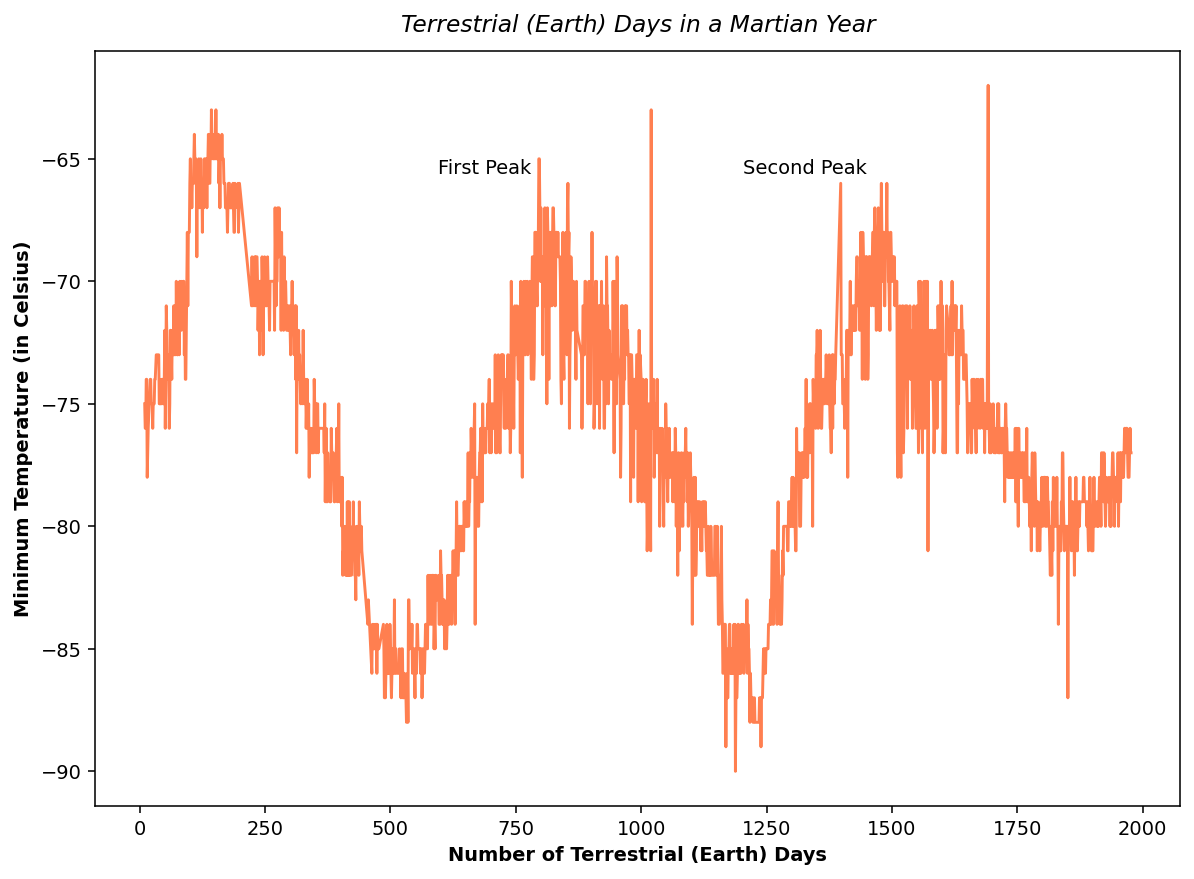

In [242]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Step 1: Generate a bar plot with the necessary axis formating using pyplot
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], color = 'coral')
plt.title('Terrestrial (Earth) Days in a Martian Year', fontstyle = 'italic', size = 12, pad = 10)
plt.xlabel('Number of Terrestrial (Earth) Days', fontweight = 'bold', size = 10)
plt.ylabel('Minimum Temperature (in Celsius)', fontweight = 'bold', size=10)

# Step 2: Annotate the related peaks in the plot for added clarity
plt.annotate('First Peak', xy = (780, -65), fontsize = 10, color = "black", horizontalalignment = 'right', verticalalignment = 'top')
plt.annotate('Second Peak', xy = (1450, -65), fontsize = 10, color = "black", horizontalalignment = 'right', verticalalignment = 'top')

# Step 3: Display the plot
plt.show()

#### Observation and Insights:
---
- *Coldest vs. Hottest Martian Months*: On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!<br>
- *Average Atmospheric Pressure*: Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.<br>
- *Terrestrial (Earth) days vs. Martian Days*: The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.Based on the plot above, this is accurate within a 25% estimate based on the peak values of the plot.<br>
---



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [181]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data',  encoding='utf8', index = False)

In [182]:
browser.quit()